# Todo
1. Finish code block.
2. Finish experiments and analysis.
3. Upload HW1_name.ipynb to eeclass->homework.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [2]:

print(rd.rand())

0.5734926331985309


#Building environment

In this homework, we are going to implement a 6-armed bandit problem with mean:

$q_*(1)$ |$q_*(2)$ |$q_*(3)$ |$q_*(4)$ |$q_*(5)$ |$q_*(6)$  
:--:|:--:|:--:|:--:|:--:|:--:
0.3|-5|5|-1.1|1|0
<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|

  When you chooce the $n^{th}$ bandit , the reward should be given by a normal distribution with mean $q_∗(n)$ and variance 1.



In [3]:
class bandit:

  # initialize the means and variance of the bandit
  def __init__(self,mean=[0.3, -5, 5, -1.1, 1, 0], variance = 1):
    self.mean = mean
    self.banditNums = len(mean)
    self.variance = variance

  #give a action, recieve a reward
  def step(self, action):

    # where action is the chosen bandit (i.e. action is between 0~5)
    # To return a number from a normal distribution, you might want to call the function rd.normal().
    
    
    ######## your code here ##########
    reward = rd.normal(self.mean[action],self.variance)
    ######################################

    return reward


#implement learing process

The learning process in this homework is relatively simple:
1. Choose an action:
  
  Generally speaking, it is better to always choose the best option, but in order to keep the exporation going, we sometimes choose random action with a probability of $\epsilon$.

2. Update the action values:

  After receiving the reward, we will update the action value. In this homework we simply use the average reward as the the action value. Try using the following relationship when updating.

  $NewEstimate\leftarrow OleEstimate + StepSize\bigg[Target - OldEstimate\bigg].$

  $Q_{n+1} = Q_{n}+1/n\times\bigg[R_n - Q_n\bigg]$


In [4]:
class learning:

  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]

  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    if rd.random() > epsilon:
      # print(self.actionValues)
      action = np.argmax(self.actionValues)
    else:
      action = rd.randint(0,5)
    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########
    self.actionValues[action] = self.actionValues[action] + (reward-self.actionValues[action])/self.chosenTimes[action]
   

    ######################################

  def run(self, epis, epsilon):
    self.actionValues = [10,10,10,10,10,10]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(epis):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

# Test your results (60%)
- you need to get picture looking like following picture.
- We will use 'matplotlib' to visualize the result. For more information, click on the [LINK](https://matplotlib.org/2.0.2/api/pyplot_api.html) to see the documentation or search tutorials online.

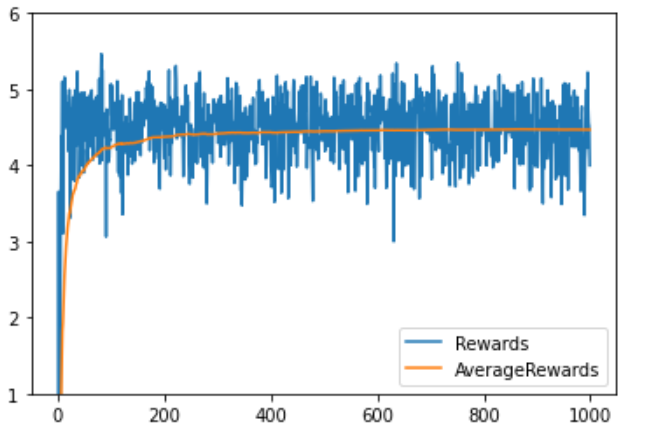

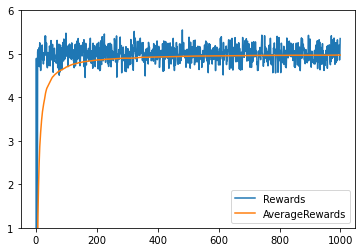

In [5]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.
rewards_all=[]
averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))


plt.figure()
plt.plot(np.average(rewards_all,axis=0),label="Rewards")
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards")
plt.legend()
plt.ylim(1,6)
plt.show()


# Experiments and Analysis(40%)

Q1(20%) Get average rewards curves of different settings over 1000 episodes and average the 
result of 30 learning process into a figure.


▪ Vary 𝜀 value with 0, 0.2, 0.8. What happens? Why? Please plot the curves
into a figure.



因為本題action的reward間差距較大，因此基本上只要每個action都嘗試後就找到了最佳的action，幾乎不用探索，若設為更大的$\epsilon$ 0.2或0.8，反而花太多次於探索上，選最佳action的次數很少，導致最終的aceragereward減少。

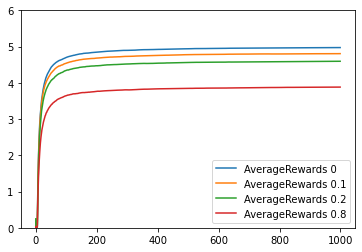

In [6]:
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))
plt.figure()

plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards 0")


for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.1)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards 0.1")

for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.2)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))


plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards 0.2")

for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.8)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards 0.8")
plt.legend()
plt.ylim(0,6)
plt.show()

Q2(10%) Is there any way to always get the best result when 𝜀 = 0? How?

如果要在$\epsilon$為0時可以得到最佳答案，也就表示過程中完全不會進行exploration，必須要能確保所選的action是最佳的，所以可行的方法應該是在開始選擇前要先純粹進行exploration，也就是不斷隨機選擇，評估每個action的actionvalue，等到從每個action取得足夠的資訊能確保其actionvalue正確後，再開始進行選擇，此時每次都會選擇actionvalue最大者，所以不用在exploration，$\epsilon$設為0即可，不過這個方法主要就是前面預先花時間exploration，開始選擇後便不再exploration。

Q3(10%)Is there a way to compute the value of convergence?

因為本題當中的所有action的reward皆為normal distribution，可以預期只要執行次數夠多，actionvalue最終將會非常接近於它們各自的mean，而隨機選取的機率為$\epsilon$， 最終應會收斂至max(mean)$\times$(1-$\epsilon$)+(mean的總和/action的數量)$\times$ $\epsilon$，因為有$1-\epsilon$的機率會選mean最大者，而$\epsilon$的機率則隨機選取。